# 01. Analysis Seoul CCTV

## 1. 데이터 읽기

In [63]:
import pandas as pd

In [64]:
# !conda install -y pandas

In [65]:
CCTV_Seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", encoding="utf-8")

In [66]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [67]:
CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [68]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [69]:
CCTV_Seoul.columns[0]

'기관명'

In [70]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: "구별"}, inplace=True)

In [71]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [72]:
pop_Seoul = pd.read_excel(
    "../data/01. Seoul_Population.xls", header=2, usecols="B, D, G, J, N"
)

In [73]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [74]:
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0]: "구별",
        pop_Seoul.columns[1]: "인구수",
        pop_Seoul.columns[2]: "한국인",
        pop_Seoul.columns[3]: "외국인",
        pop_Seoul.columns[4]: "고령자"
    },
    inplace=True
)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


---

### Pandas 기초
- python 에서 R만큼 강력한 데이터 핸들링 성능을 제공하는 모듈
- 단일 프로세스에서는 최대 효율
- 코딩 가능하고 응용 가능한 엑셀로 받아들여도 됨
- 누군가는 스테로이드 맞은 엑셀로 표현함

#### Series
- index와 value로 이루어져 있다.
- 한 가지 데이터 타입만 가질 수 있다.

In [75]:
import pandas as pd
import numpy as np

- pandas는 통상 pd
- numpy는 통상 np

In [76]:
pd.Series()

C:\Users\ThinkBook\AppData\Local\Temp\ipykernel_30200\2031691219.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

In [77]:
pd.Series([1, 2, 3, 4])

0    1
1    2
2    3
3    4
dtype: int64

In [78]:
pd.Series([1, 2, 3, 4], dtype=np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [79]:
pd.Series([1, 2, 3, 4], dtype=str)

0    1
1    2
2    3
3    4
dtype: object

In [80]:
pd.Series(np.array([1, 2, 3]))

0    1
1    2
2    3
dtype: int32

In [81]:
pd.Series({"Key":"Value"})

Key    Value
dtype: object

In [82]:
data = pd.Series(np.array([1, 2, 3, 4, "5"]))
data

0    1
1    2
2    3
3    4
4    5
dtype: object

In [83]:
# 짝수를 찾고 싶다.
data % 2

TypeError: not all arguments converted during string formatting

In [84]:
data = pd.Series(np.array([1, 2, 3, 4]))
data

0    1
1    2
2    3
3    4
dtype: int32

In [85]:
data % 2

0    1
1    0
2    1
3    0
dtype: int32

#### 날짜 데이터

In [86]:
dates = pd.date_range('20220328', periods=6)
dates

DatetimeIndex(['2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-02'],
              dtype='datetime64[ns]', freq='D')

### DataFrame
- pd.Series()
    - index, value
- pd.DataFrame()
    - index, value, column

In [87]:
# 표준정규분포에서 샘플링한 난수 생성
data = np.random.randn(6,4)
data

array([[-0.32354588,  0.23544235,  0.89521472,  1.25570041],
       [ 0.58157479, -1.68908918, -0.29938535,  0.75104799],
       [ 0.01822861, -1.69799749,  0.3695343 ,  0.1862764 ],
       [-1.82165492, -2.4717046 , -0.27840341, -0.17065   ],
       [ 1.42454982,  1.70999158, -0.97487154, -0.3438247 ],
       [-0.24126419, -0.22905096, -0.14793278, -0.25881927]])

In [88]:
df = pd.DataFrame(data, index=dates, columns=["A", "B", "C", "D"])
df

,A,B,C,D
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650
2022-04-01,1.424550,1.709992,-0.974872,-0.343825
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819


### 데이터 프레임 정보 탐색
- df.head()

In [89]:
df.head()

,A,B,C,D
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650
2022-04-01,1.424550,1.709992,-0.974872,-0.343825


- df.tail()

In [90]:
df.tail()

,A,B,C,D
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650
2022-04-01,1.424550,1.709992,-0.974872,-0.343825
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819


- df.index

In [91]:
df.index

DatetimeIndex(['2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-02'],
              dtype='datetime64[ns]', freq='D')

In [92]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [93]:
df.values

array([[-0.32354588,  0.23544235,  0.89521472,  1.25570041],
       [ 0.58157479, -1.68908918, -0.29938535,  0.75104799],
       [ 0.01822861, -1.69799749,  0.3695343 ,  0.1862764 ],
       [-1.82165492, -2.4717046 , -0.27840341, -0.17065   ],
       [ 1.42454982,  1.70999158, -0.97487154, -0.3438247 ],
       [-0.24126419, -0.22905096, -0.14793278, -0.25881927]])

- df.info() : 데이터 프레임 기본 정보 확인

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2022-03-28 to 2022-04-02
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


- df.describe() : 데이터 프레임의 기술통계 정보 확인

In [95]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.060352,-0.690401,-0.072641,0.236622
std,1.079571,1.550328,0.639641,0.640928
min,-1.821655,-2.471705,-0.974872,-0.343825
25%,-0.302975,-1.695770,-0.294140,-0.236777
50%,-0.111518,-0.959070,-0.213168,0.007813
75%,0.440738,0.119319,0.240168,0.609855
max,1.424550,1.709992,0.895215,1.255700


### 데이터 정렬
- sort_values()
- 특정 컬럼(열)을 기준으로 데이터를 정렬한다.

In [96]:
df

,A,B,C,D
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650
2022-04-01,1.424550,1.709992,-0.974872,-0.343825
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819


In [97]:
df.sort_values(by="B", ascending=False, inplace=True)

In [98]:
df

,A,B,C,D
2022-04-01,1.424550,1.709992,-0.974872,-0.343825
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650


### 데이터 선택

In [99]:
df

,A,B,C,D
2022-04-01,1.424550,1.709992,-0.974872,-0.343825
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650


In [100]:
# 한 개 컬럼 선택
df["A"]

2022-04-01    1.424550
2022-03-28   -0.323546
2022-04-02   -0.241264
2022-03-29    0.581575
2022-03-30    0.018229
2022-03-31   -1.821655
Name: A, dtype: float64

In [101]:
type(df["A"])

pandas.core.series.Series

In [102]:
df.A # 문자열로 되어있을 경우에만 이렇게 사용할 수 있다.

2022-04-01    1.424550
2022-03-28   -0.323546
2022-04-02   -0.241264
2022-03-29    0.581575
2022-03-30    0.018229
2022-03-31   -1.821655
Name: A, dtype: float64

In [103]:
# 두 개 이상 컬럼 선택
df[["A", "B"]]

,A,B
2022-04-01,1.424550,1.709992
2022-03-28,-0.323546,0.235442
2022-04-02,-0.241264,-0.229051
2022-03-29,0.581575,-1.689089
2022-03-30,0.018229,-1.697997
2022-03-31,-1.821655,-2.471705


In [104]:
df = pd.DataFrame(data, index=dates, columns=["A", "B", "C", "D"])
df

,A,B,C,D
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650
2022-04-01,1.424550,1.709992,-0.974872,-0.343825
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819


### offset index
- [n:m] : n부터 m-1까지
- 인덱스나 컬럼의 이름으로 slice하는 경우는 끝을 포함한다.

In [105]:
df

,A,B,C,D
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650
2022-04-01,1.424550,1.709992,-0.974872,-0.343825
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819


In [106]:
df[0:3]

,A,B,C,D
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276


In [107]:
df["20220328":"20220331"]

,A,B,C,D
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650


- lodc : location
- index 이름으로 특정 행과 열을 선택한다.

In [108]:
df

,A,B,C,D
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650
2022-04-01,1.424550,1.709992,-0.974872,-0.343825
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819


In [109]:
df.loc[:,["A", "B"]]

,A,B
2022-03-28,-0.323546,0.235442
2022-03-29,0.581575,-1.689089
2022-03-30,0.018229,-1.697997
2022-03-31,-1.821655,-2.471705
2022-04-01,1.424550,1.709992
2022-04-02,-0.241264,-0.229051


In [110]:
df.loc["20220329":"20220331", ["A", "D"]]

,A,D
2022-03-29,0.581575,0.751048
2022-03-30,0.018229,0.186276
2022-03-31,-1.821655,-0.170650


In [111]:
df.loc["20220329":"20220331", "A":"D"]

,A,B,C,D
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650


In [112]:
df.loc["20220329", ["A", "B"]]

A    0.581575
B   -1.689089
Name: 2022-03-29 00:00:00, dtype: float64

- iloc : integer location
    - 컴퓨터가 인식하는 인덱스 값으로 선택

In [113]:
df

,A,B,C,D
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650
2022-04-01,1.424550,1.709992,-0.974872,-0.343825
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819


In [114]:
df.iloc[3]

A   -1.821655
B   -2.471705
C   -0.278403
D   -0.170650
Name: 2022-03-31 00:00:00, dtype: float64

In [115]:
df.iloc[3, 2]

-0.27840341415836206

In [116]:
df.iloc[3:5, 0:2]

,A,B
2022-03-31,-1.821655,-2.471705
2022-04-01,1.424550,1.709992


In [117]:
df.iloc[[1,2,4], [0,2]]

,A,C
2022-03-29,0.581575,-0.299385
2022-03-30,0.018229,0.369534
2022-04-01,1.424550,-0.974872


In [118]:
df.iloc[:, 1:3]

,B,C
2022-03-28,0.235442,0.895215
2022-03-29,-1.689089,-0.299385
2022-03-30,-1.697997,0.369534
2022-03-31,-2.471705,-0.278403
2022-04-01,1.709992,-0.974872
2022-04-02,-0.229051,-0.147933


### condition

In [119]:
df

,A,B,C,D
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650
2022-04-01,1.424550,1.709992,-0.974872,-0.343825
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819


In [120]:
# A컬럼에서 0보다 큰 숫자(양수)만 선택

df["A"] > 0

2022-03-28    False
2022-03-29     True
2022-03-30     True
2022-03-31    False
2022-04-01     True
2022-04-02    False
Freq: D, Name: A, dtype: bool

In [121]:
df[df["A"] > 0]

,A,B,C,D
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-04-01,1.424550,1.709992,-0.974872,-0.343825


In [122]:
df[df > 0]

,A,B,C,D
2022-03-28,NaN,0.235442,0.895215,1.255700
2022-03-29,0.581575,NaN,NaN,0.751048
2022-03-30,0.018229,NaN,0.369534,0.186276
2022-03-31,NaN,NaN,NaN,NaN
2022-04-01,1.424550,1.709992,NaN,NaN
2022-04-02,NaN,NaN,NaN,NaN


- NaN : Not a Number

### 컬럼추가

In [123]:
df

,A,B,C,D
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650
2022-04-01,1.424550,1.709992,-0.974872,-0.343825
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819


In [124]:
df["E"] = ["one", "two", "three", "four", "five", "six"]
df

,A,B,C,D,E
2022-03-28,-0.323546,0.235442,0.895215,1.255700,one
2022-03-29,0.581575,-1.689089,-0.299385,0.751048,two
2022-03-30,0.018229,-1.697997,0.369534,0.186276,three
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650,four
2022-04-01,1.424550,1.709992,-0.974872,-0.343825,five
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819,six


- isin()
- 특정 요소가 있는지 확인

In [125]:
df["E"].isin(["two"])

2022-03-28    False
2022-03-29     True
2022-03-30    False
2022-03-31    False
2022-04-01    False
2022-04-02    False
Freq: D, Name: E, dtype: bool

In [126]:
df["E"].isin(["two", "five"])

2022-03-28    False
2022-03-29     True
2022-03-30    False
2022-03-31    False
2022-04-01     True
2022-04-02    False
Freq: D, Name: E, dtype: bool

In [127]:
df[df["E"].isin(["two", "five"])]

,A,B,C,D,E
2022-03-29,0.581575,-1.689089,-0.299385,0.751048,two
2022-04-01,1.424550,1.709992,-0.974872,-0.343825,five


### 특정 컬럼 제거
- del
- drop

In [128]:
df

,A,B,C,D,E
2022-03-28,-0.323546,0.235442,0.895215,1.255700,one
2022-03-29,0.581575,-1.689089,-0.299385,0.751048,two
2022-03-30,0.018229,-1.697997,0.369534,0.186276,three
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650,four
2022-04-01,1.424550,1.709992,-0.974872,-0.343825,five
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819,six


In [129]:
del df["E"]
df

,A,B,C,D
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650
2022-04-01,1.424550,1.709992,-0.974872,-0.343825
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819


In [130]:
df.drop(['D'], axis=1) # axis = 0 가로, axis = 1 세로

,A,B,C
2022-03-28,-0.323546,0.235442,0.895215
2022-03-29,0.581575,-1.689089,-0.299385
2022-03-30,0.018229,-1.697997,0.369534
2022-03-31,-1.821655,-2.471705,-0.278403
2022-04-01,1.424550,1.709992,-0.974872
2022-04-02,-0.241264,-0.229051,-0.147933


In [131]:
df.drop(['20220329'])

,A,B,C,D
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650
2022-04-01,1.424550,1.709992,-0.974872,-0.343825
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819


### apply()

In [132]:
df

,A,B,C,D
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650
2022-04-01,1.424550,1.709992,-0.974872,-0.343825
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819


In [133]:
df["A"].apply("sum")

-0.36211177250308113

In [134]:
df["A"].apply("mean")

-0.060351962083846855

In [135]:
df["A"].apply("min"), df["A"].apply("max")

(-1.8216549217006652, 1.424549823665953)

In [136]:
df[["A", "D"]].apply("sum")

A   -0.362112
D    1.419731
dtype: float64

In [137]:
df["A"].apply(np.sum)

2022-03-28   -0.323546
2022-03-29    0.581575
2022-03-30    0.018229
2022-03-31   -1.821655
2022-04-01    1.424550
2022-04-02   -0.241264
Freq: D, Name: A, dtype: float64

In [138]:
df["A"].apply(np.mean)

2022-03-28   -0.323546
2022-03-29    0.581575
2022-03-30    0.018229
2022-03-31   -1.821655
2022-04-01    1.424550
2022-04-02   -0.241264
Freq: D, Name: A, dtype: float64

In [139]:
df["A"].apply(np.std)

2022-03-28    0.0
2022-03-29    0.0
2022-03-30    0.0
2022-03-31    0.0
2022-04-01    0.0
2022-04-02    0.0
Freq: D, Name: A, dtype: float64

In [140]:
df.apply(np.sum)

A   -0.362112
B   -4.142408
C   -0.435844
D    1.419731
dtype: float64

In [141]:
df

,A,B,C,D
2022-03-28,-0.323546,0.235442,0.895215,1.255700
2022-03-29,0.581575,-1.689089,-0.299385,0.751048
2022-03-30,0.018229,-1.697997,0.369534,0.186276
2022-03-31,-1.821655,-2.471705,-0.278403,-0.170650
2022-04-01,1.424550,1.709992,-0.974872,-0.343825
2022-04-02,-0.241264,-0.229051,-0.147933,-0.258819


In [142]:
def plusminus(num):
    return "plus" if num > 0 else "minus"

In [143]:
df["A"].apply(plusminus)

2022-03-28    minus
2022-03-29     plus
2022-03-30     plus
2022-03-31    minus
2022-04-01     plus
2022-04-02    minus
Freq: D, Name: A, dtype: object

In [144]:
df["A"].apply(lambda num : "plus" if num > 0 else "minus")

2022-03-28    minus
2022-03-29     plus
2022-03-30     plus
2022-03-31    minus
2022-04-01     plus
2022-04-02    minus
Freq: D, Name: A, dtype: object

___

## 2. CCTV 데이터 훑어보기

In [145]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [146]:
CCTV_Seoul.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [147]:
CCTV_Seoul.sort_values(by="소계", ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [148]:
CCTV_Seoul.sort_values(by="소계", ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [149]:
# 기존 컬럼이 없으면 추가, 있으면 수정
CCTV_Seoul["최근증가율"] = (
    (CCTV_Seoul["2016년"] + CCTV_Seoul["2015년"] + CCTV_Seoul["2014년"] / CCTV_Seoul["2013년도 이전"])*100
)
CCTV_Seoul.sort_values(by="최근증가율", ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,151633.281734
4,관악구,2109,846,260,390,613,100330.732861
8,노원구,1566,542,57,451,516,96710.516605
22,종로구,1619,464,314,211,630,84167.672414
10,동대문구,1870,1070,23,198,579,77702.149533


In [151]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,151633.281734
1,강동구,1010,379,99,155,377,53226.121372
2,강북구,831,369,120,138,204,34232.520325
3,강서구,911,388,258,184,81,26566.494845
4,관악구,2109,846,260,390,613,100330.732861


----

## 3. 인구현황 데이터 훑어보기

In [152]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [153]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,520929,503297,17632,70046
22,서초구,445401,441102,4299,53205
23,강남구,561052,556164,4888,65060
24,송파구,671173,664496,6677,76582
25,강동구,440359,436223,4136,56161


In [154]:
pop_Seoul.drop([0], axis=0, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [155]:
pop_Seoul["구별"].unique() # 한번이라도 등장한 데이터가 어떤게 있는지 보여줌

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [156]:
len(pop_Seoul["구별"].unique())

25

In [157]:
# 외국인 비율, 고령자 비율
pop_Seoul["외국인비율"] = pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"] = pop_Seoul["고령자"] / pop_Seoul["인구수"] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [158]:
pop_Seoul.sort_values(["인구수"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [159]:
pop_Seoul.sort_values(["외국인"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


In [160]:
pop_Seoul.sort_values(["외국인비율"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
18,금천구,253491,235154,18337,34170,7.233787,13.479769
17,구로구,441559,410742,30817,58794,6.979135,13.315095
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118


In [161]:
pop_Seoul.sort_values(by="고령자", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [162]:
pop_Seoul.sort_values(by="고령자비율", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


---

## 4. 두 데이터 합치기

### Pandas에서 데이터 프레임을 병합하는 방법
- pd.concat()
- pd.merge()
- pd.join()

In [193]:
# 딕셔너리 안의 리스트 형태

left = pd.DataFrame({
    "key":["K0", "K4", "K2", "K3"],
    "A":["A0", "A1", "A2", "A3"],
    "B":["B0", "B1", "B2", "B3"]
})
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [197]:
# 리스트 안의 딕셔너리 형태

right = pd.DataFrame([
    {"key":"K0", "C":"C0", "D":"D0" },
    {"key":"K1", "C":"C1", "D":"D1" },
    {"key":"K2", "C":"C2", "D":"D2" },
    {"key":"K3", "C":"C3", "D":"D3" }
])
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


#### pd.merge()
- 두 데이터 프레임에서 컬럼이나 인덱스를 기준으로 잡고 병합하는 방법
- 기준이 되는 컬럼이나 인덱스를 키값이라고 한다.
- 기준이 되는 키값은 두 데이터 프레임에 모두 포함되어 있어야 한다.

In [198]:
pd.merge(left, right, how="inner", on="key") # inner는 교집합으로 기본이 됨

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [199]:
pd.merge(left, right, how="left", on="key") # 기준을 left로 잡았기 때문에 K1은 없고, K4에 없는 C,D는 NaN으로 표현

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [200]:
pd.merge(left, right, how="right", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [201]:
pd.merge(left, right, how="outer", on="key") # outer는 합집합으로 모든 값을 가지고 옴, NaN 값을 어떻게 처리할 지 생각해야 함

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


---

In [163]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,151633.281734


In [164]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656


In [165]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,151633.281734,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,53226.121372,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,34232.520325,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,26566.494845,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,100330.732861,520929,503297,17632,70046,3.384722,13.446362


#### 년도별 데이터 컬럼 삭제
- del
- drop()

In [166]:
del data_result["2013년도 이전"]

In [167]:
del data_result["2014년"]

In [168]:
data_result.head(3)

,구별,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,584,932,151633.281734,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,155,377,53226.121372,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,138,204,34232.520325,328002,324479,3523,56530,1.074079,17.234651


In [169]:
data_result.drop(["2015년", "2016년"], axis=1, inplace=True)

In [170]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,151633.281734,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,53226.121372,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,34232.520325,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,26566.494845,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,100330.732861,520929,503297,17632,70046,3.384722,13.446362


#### 인덱스 변경
- set_index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [171]:
data_result.set_index("구별", inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,151633.281734,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,53226.121372,440359,436223,4136,56161,0.939234,12.753458
강북구,831,34232.520325,328002,324479,3523,56530,1.074079,17.234651
강서구,911,26566.494845,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,100330.732861,520929,503297,17632,70046,3.384722,13.446362


#### 상관계수
- corr()
- corelation의 약자이다.
- 상관계수가 0.2 이상인 데이터를 비교

In [172]:
data_result.corr() # 데이터 내에서 object타입이 없었기 때문에 연산이 가능

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,0.766882,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,0.766882,1.000000,0.262735,0.261159,-0.026258,0.214499,-0.077086,-0.197837
인구수,0.232555,0.262735,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,0.261159,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.026258,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,0.214499,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.077086,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,-0.197837,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [173]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     int64  
 3   한국인     25 non-null     int64  
 4   외국인     25 non-null     int64  
 5   고령자     25 non-null     int64  
 6   외국인비율   25 non-null     float64
 7   고령자비율   25 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.8+ KB


In [176]:
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"] * 100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,151633.281734,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,53226.121372,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,34232.520325,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,26566.494845,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,100330.732861,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [177]:
data_result.sort_values(by="CCTV비율", ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,84167.672414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,51015.935673,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,42046.004843,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,151633.281734,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,62307.566766,253491,235154,18337,34170,7.233787,13.479769,0.531774


In [178]:
data_result.sort_values(by="CCTV비율", ascending=True).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,26566.494845,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,53103.969754,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,28623.772102,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,53226.121372,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,22713.612565,372298,357703,14595,43953,3.920247,11.805865,0.235833


---

# matplotlib 기초

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rc

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
# %matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline") # 그래프를 바로 나타내기 위함

matplotlib 그래프 기본 형태

```
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()
```

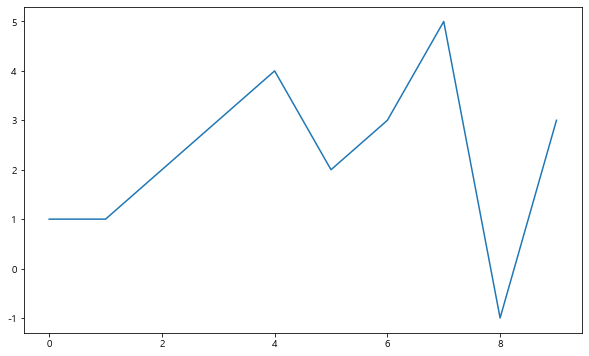

In [10]:
plt.figure(figsize=(10, 6))
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 2, 3, 4, 2, 3, 5, -1, 3])
plt.show()

### 예제1 : 그래프 기초

#### 삼각함수 그리기
- np.arange(a, b, s): a부터 b까지 s의 간격
- np.sin(value)

In [11]:
import numpy as np

t= np.arange(0, 12, 0.01)
y = np.sin(t)

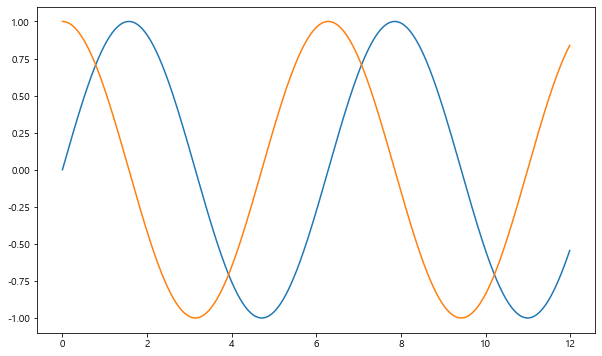

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.show()

- 1. 격자무늬 추가
- 2. 그래프 제목 추가
- 3. x축, y축 제목 추가
- 4. 주황색, 파란색 선 데이터 의미 구분

In [17]:
def drawGraph():
    
    plt.figure(figsize=(10, 6))
    plt.plot(t, np.sin(t), label="sin")
    plt.plot(t, np.cos(t), label="cos")
    plt.grid(True) # 격자무늬
    # plt.legend(labels=["sin", "cos"]) #범례
    plt.legend(loc=2)
    plt.title("Example of sinewave")
    plt.xlabel("time")
    plt.ylabel("Amplitude") #진폭
    plt.show()

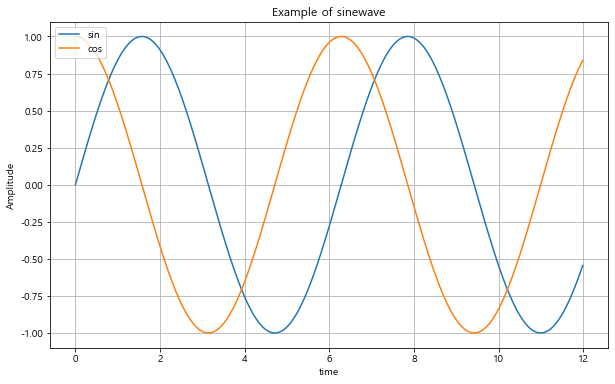

In [18]:
drawGraph()

### 예제2: 그래프 커스텀

In [19]:
t = np.arange(0, 5, 0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

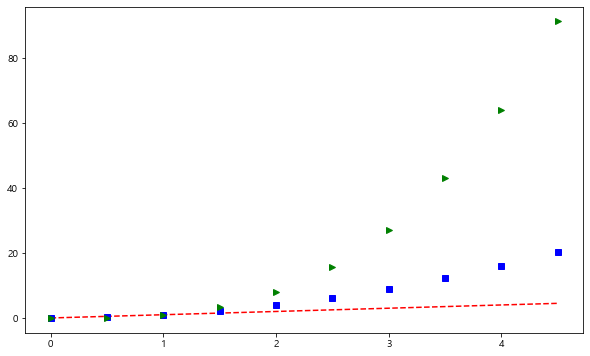

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(t, t, "r--")
plt.plot(t, t ** 2, "bs")
plt.plot(t, t ** 3, "g>")
plt.show()

In [23]:
# t = [0, 1, 2, 3, 4, 5, 6]
t = list(range(0, 7))
y = [1, 4, 5, 8, 9, 5, 3]

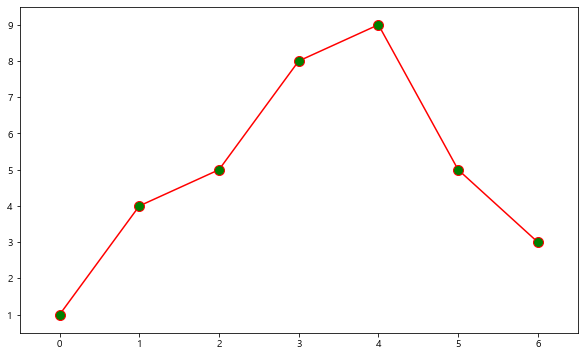

In [29]:
def drawGraph():
    
    plt.figure(figsize=(10, 6))
    plt.plot(
        t,
        y,
        color="red",
        linestyle="-",
        marker="o",
        markerfacecolor="green",
        markersize=10
    )
    plt.xlim([-0.5, 6.5])
    plt.ylim([0.5, 9.5])
    plt.show()
drawGraph()

### 예제3: scatter plot

In [30]:
t = np.array(range(0, 10))
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])

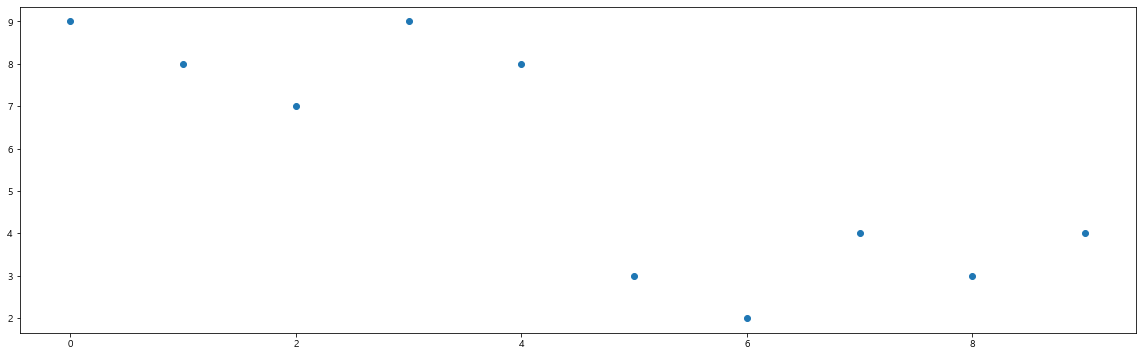

In [33]:
def drawGraph():
    
    plt.figure(figsize=(20, 6))
    plt.scatter(t, y)
    plt.show()
drawGraph()

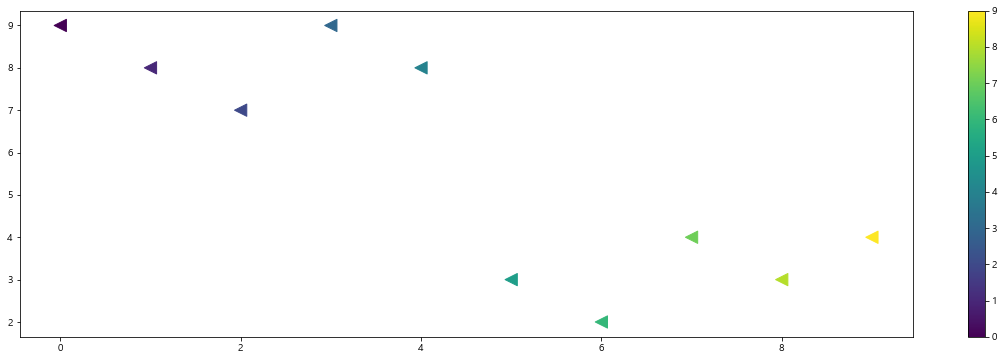

In [35]:
colormap = t

def drawGraph():
    
    plt.figure(figsize=(20, 6))
    plt.scatter(t, y, s=150, c=colormap, marker="<")
    plt.colorbar()
    plt.show()
drawGraph()

### 예제4: Pandas에서 plot 그리기
- matplotlib를 가져와서 사용한다.

In [179]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,151633.281734,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,53226.121372,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,34232.520325,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,26566.494845,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,100330.732861,520929,503297,17632,70046,3.384722,13.446362,0.404854


<AxesSubplot:xlabel='구별'>

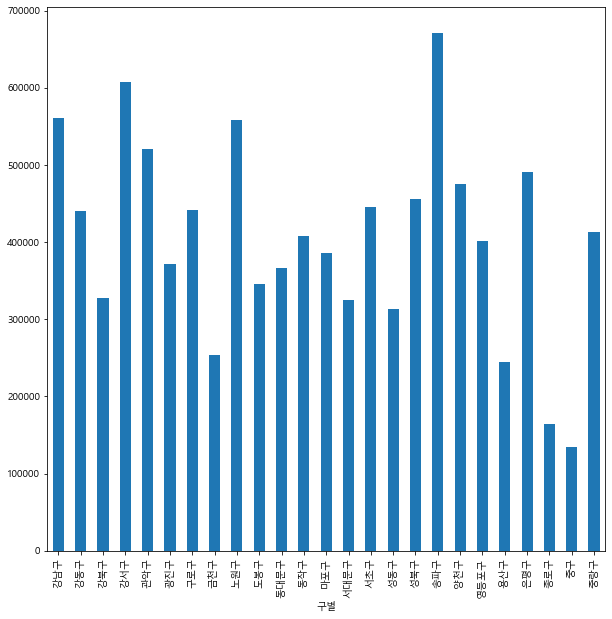

In [180]:
data_result["인구수"].plot(kind="bar", figsize=(10, 10))

<AxesSubplot:ylabel='구별'>

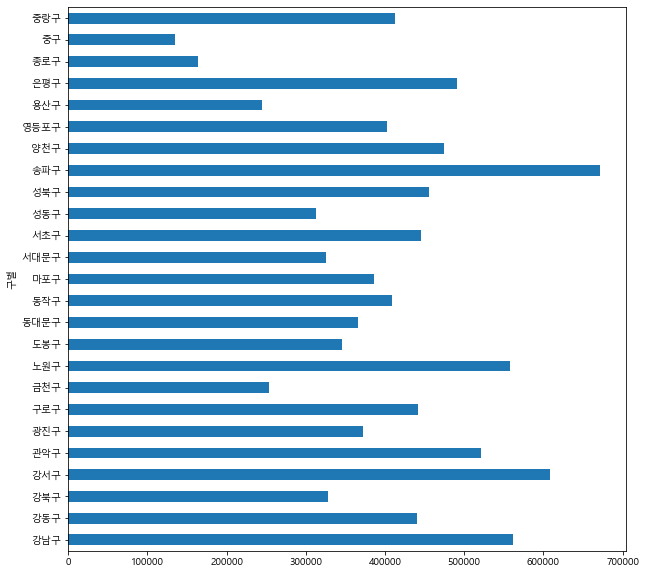

In [181]:
data_result["인구수"].plot(kind="barh", figsize=(10, 10))

---

## 5. 데이터 시각화

In [182]:
import matplotlib.pyplot as plt
# import matplotlib as mpl

plt.rcParams["axes.unicode_minus"]=False # 마이너스 부호 때문에 한글이 깨질 수 있어서 주는 설정
plt.rc("font", family="Malgun Gothic")
# %matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")

In [183]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,151633.281734,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,53226.121372,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,34232.520325,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,26566.494845,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,100330.732861,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 소계 컬럼 시각화

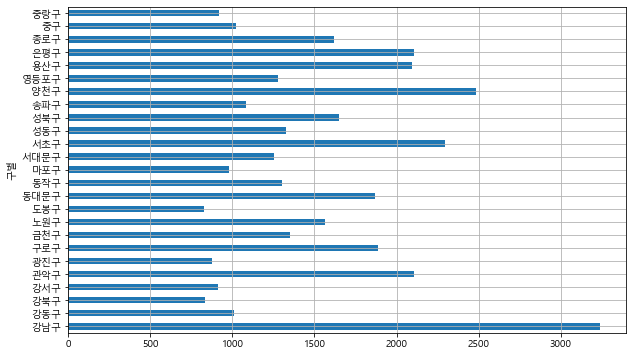

In [186]:
data_result["소계"].plot(kind="barh", grid=True, figsize=(10, 6));

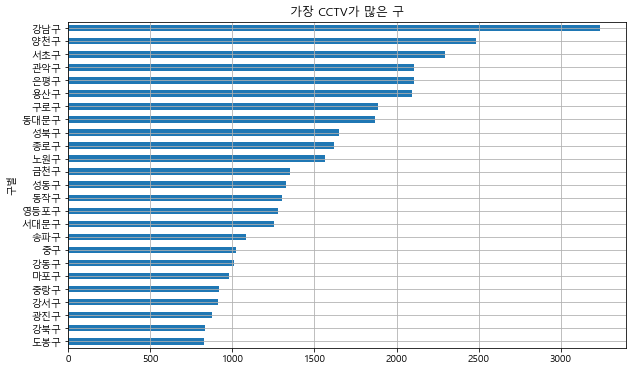

In [191]:
def drawGraph():
    data_result["소계"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 6));
drawGraph()

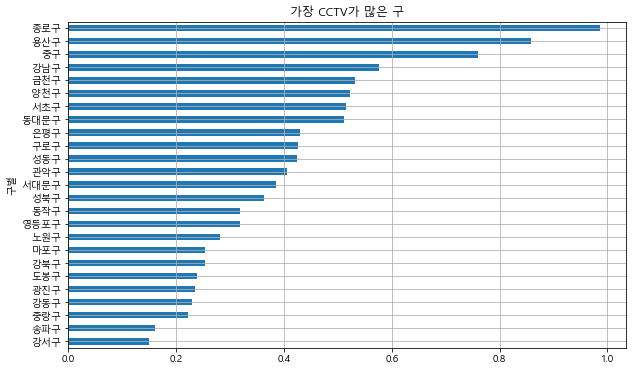

In [192]:
def drawGraph():
    data_result["CCTV비율"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 6));
drawGraph()

---

## 6. 데이터 경향 표시

In [193]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,151633.281734,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,53226.121372,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,34232.520325,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,26566.494845,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,100330.732861,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 인구수와 소계 컬럼으로 scatter plot 그리기

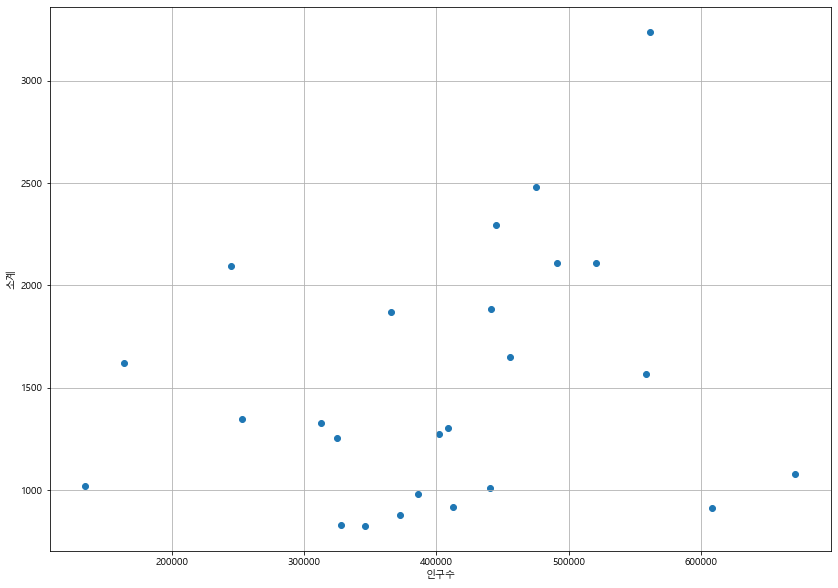

In [194]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"])
    plt.xlabel("인구수")
    plt.ylabel("소계")
    plt.grid(True)
    plt.show()
drawGraph()

#### Numpy를 이용한 1차 직선 만들기
- np.plotfit(): 직선을 구성하기 위한 계수를 계산
- np.poly1d(): polyfit으로 찾은 계수로 파이썬에서 사용할 수 있는 함수로 만들어주는 기능

In [195]:
import numpy as np

In [197]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [198]:
f1 = np.poly1d(fp1)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

- 인구가 40만인 구에서 서울시의 전체 경향에 맞는 적당한 CCTV의 수는?

In [200]:
f1(400000)

1509.7809252413333

- 경향선을 그리기 위한 x 데이터 생성
- np.linspace(a, b, n): a부터 b까지 n개의 등간격 데이터 생성

In [203]:
fx = np.linspace(100000, 700000, 100)

- 경향선을 그리기

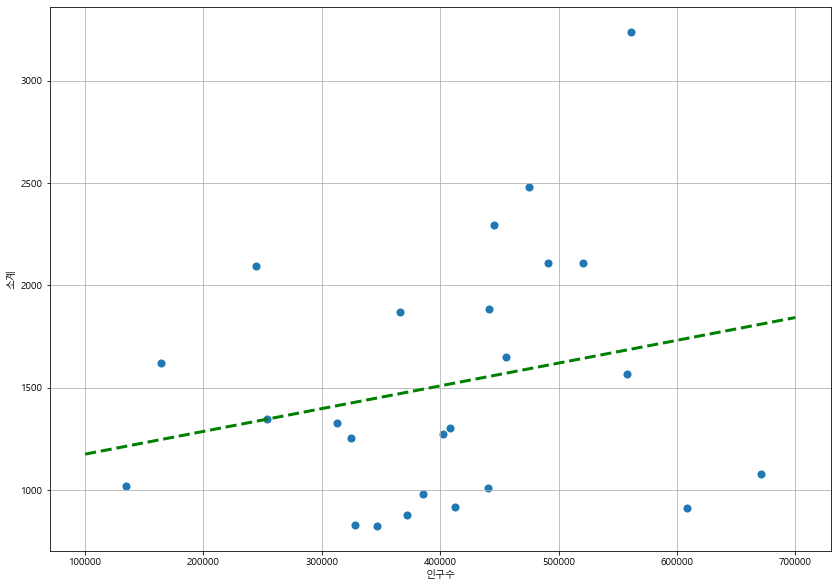

In [215]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="green") #경향선 그래프
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show()
drawGraph()

---

## 7. 강조하고 싶은 데이터를 시각화해보자

### 그래프 다듬기
#### 경향과의 오차 만들기
- 경향(trend)과의 오차를 만들자
- 경향은 f1 함수에 해당 인구를 입력
- f1(data_result["인구수"])

In [206]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

In [209]:
data_result["오차"] = data_result["소계"] - f1(data_result["인구수"])
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,151633.281734,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,53226.121372,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,34232.520325,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,26566.494845,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,100330.732861,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


In [210]:
# 경향과 비교해서 데이터의 오차가 너무 나는 데이터를 계산

df_sort_f = data_result.sort_values(by="오차", ascending=False) #내림차순
df_sort_t = data_result.sort_values(by="오차", ascending=True) #오름차순

In [211]:
# 경향 대비 CCTV를 많이 가진 구
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,151633.281734,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,49707.704829,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,51015.935673,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,73411.166430,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,74619.683656,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [212]:
# 경향 대비 CCTV를 적게 가진 구
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,26566.494845,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,53103.969754,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,42866.806723,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,28623.772102,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,22713.612565,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [214]:
from matplotlib.colors import ListedColormap

# colormap을 사용자 정의(user define)로 세팅
color_step = ["#e74c3c", "#eecc71", "#95a5a6", "#2ecc71", "#3498db"]
my_cmap = ListedColormap(color_step)

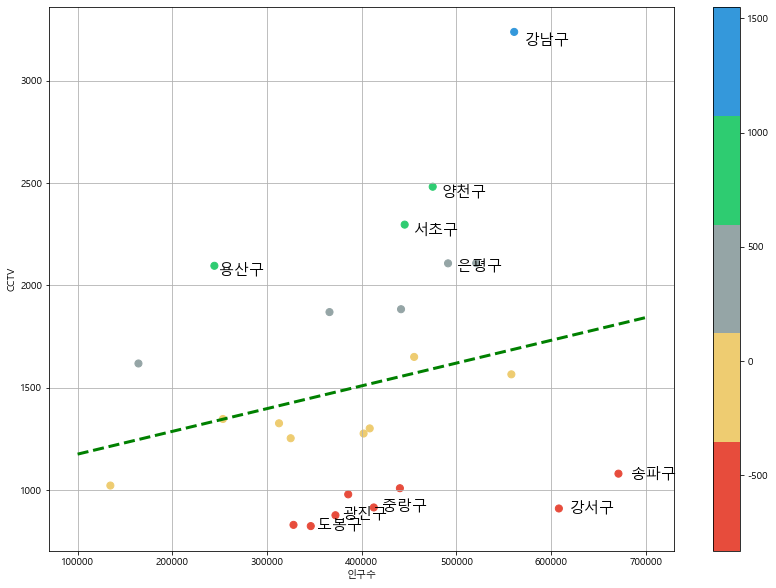

In [231]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50, c=data_result["오차"], cmap=my_cmap)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="green") #경향선 그래프
    
    for n in range(5):
        # 상위 5개
        plt.text(
            df_sort_f["인구수"][n] * 1.02, # x좌표
            df_sort_f["소계"][n] * 0.98,   # y좌표
            df_sort_f.index[n], #title
            fontsize=15            
        )
        # 하위 5개
        plt.text(
            df_sort_t["인구수"][n] * 1.02, # x좌표
            df_sort_t["소계"][n] * 0.98,   # y좌표
            df_sort_t.index[n], #title
            fontsize=15            
        )

    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid(True)
    plt.show()
drawGraph()

In [232]:
data_result.to_csv("../data/01.CCTV_result.csv", sep=",", encoding="utf-8")